In [24]:

"""
Uses lexNLP to detect legal sentences and remove them from the document
"""
from bert_serving.client import BertClient

sentences = []
for i in range(3):
    sentences += open(f"../resources/filtered/{i}.txt").read().split('.') 

non_empty = [sentence for sentence in sentences if len(sentence) > 0]

bc = BertClient()
vectors=bc.encode(non_empty)

print(vectors)

/Users/andrew/.local/share/virtualenvs/financialsummary-uGePAaB3/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=50" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


[[ 0.30229375  0.51445585  0.8663824  ... -0.27670416 -0.02666094
  -0.24133253]
 [ 0.38225195  0.56831706  0.5232722  ... -0.4396592   0.41828185
   0.07431965]
 [ 0.13062873  0.56988686  0.19007398 ... -0.3400016   0.05623284
  -0.12982665]
 ...
 [-0.04761015  0.4589723  -0.46859953 ... -0.13999797  0.09803393
   0.35896286]
 [-0.1690393  -0.4399192  -0.26286355 ... -0.23930544 -0.16704635
   0.404703  ]
 [-0.10524353 -0.02344612  0.6632863  ... -0.45542023  0.37800077
   0.22500962]]


In [25]:
import numpy as np 
num_sent = np.shape(vectors)[0]

cosine = np.zeros([num_sent, num_sent])
for i in range(num_sent):
    for j in range(num_sent):
        cosine[i][j] = 1.0 * np.dot(vectors[i,:], vectors[j,:])\
                       / (np.linalg.norm(vectors[i,:]) * np.linalg.norm
        (vectors[j,:]))

cosine

        



array([[0.99999992, 0.80424079, 0.8202698 , ..., 0.41134586, 0.57715543,
        0.7000307 ],
       [0.80424079, 1.00000008, 0.87706416, ..., 0.39509557, 0.62688613,
        0.75445359],
       [0.8202698 , 0.87706416, 1.        , ..., 0.42423544, 0.63567933,
        0.69800413],
       ...,
       [0.41134586, 0.39509557, 0.42423544, ..., 1.        , 0.47414466,
        0.45794422],
       [0.57715543, 0.62688613, 0.63567933, ..., 0.47414466, 1.        ,
        0.73421604],
       [0.7000307 , 0.75445359, 0.69800413, ..., 0.45794422, 0.73421604,
        1.        ]])

In [26]:
print(np.trace(cosine))


2094.9999979109803


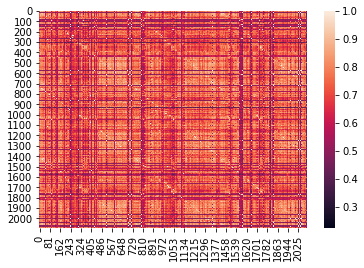

In [35]:
## get the maximum cosine similarities of two words

## kill off the diagonal
np.fill_diagonal(cosine, 0.0)
maxes = np.amax(cosine, 1)

print(maxes)


[0.99999992 1.00000008 1.         ... 0.85320435 0.85424748 0.89248635]


In [ ]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib ipympl
seaborn.heatmap(cosine)
plt.show()

range(0, 2095)


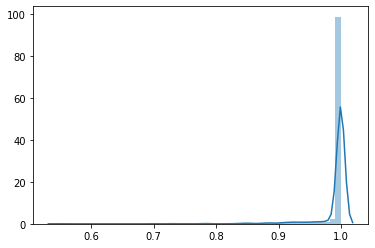

In [31]:
## plot histogram 
idcs = range(num_sent)
print(idcs)
seaborn.distplot(maxes)
# seaborn.scatterplot(list(range(num_sent)), maxes)


In [53]:
below_thresh = np.where(maxes > 1.0)
# print(below_thresh)
for low in below_thresh[0][:70]:
    print(sentences[low])

 The Company sells its products worldwide through its retail stores, online stores and direct sales force, as well as through third-party cellular network carriers, wholesalers, retailers and resellers
 The Company sells to consumers, small and mid-sized businesses and education, enterprise and government customers
Basis of Presentation and PreparationThe accompanying condensed consolidated financial statements include the accounts of the Company
 Intercompany accounts and transactions have been eliminated
 The first quarter of 2018 spanned 13 weeks, whereas a 14th week was added to the first fiscal quarter of 2017, as is done every five or six years, to realign the Company’s fiscal quarters with calendar quarters
 Beginning in 2018, the Company records any excess tax benefits or deficiencies from its equity awards as part of the provision for income taxes in its Condensed Consolidated Statements of Operations in the reporting periods in which equity vesting occurs
Derivative Financial